In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
loan_df = pd.read_csv('loan.csv')
diabetes_df = pd.read_csv('diabetes.csv')

#loan_df cleaning
loan_df.columns = loan_df.columns.str.strip()
loan_df['education'] = (loan_df['education'] == ' Graduate').astype(int)
loan_df['self_employed'] = (loan_df['self_employed'] == ' Yes').astype(int)
loan_df['loan_status'] = (loan_df['loan_status'] == ' Approved').astype(int)
loan_df = loan_df.drop(columns=['loan_id'])

loan_df = loan_df.select_dtypes(include=[np.number]).dropna()
diabetes_df = diabetes_df.select_dtypes(include=[np.number]).dropna()

loan_X = loan_df.iloc[:, :-1]
diabetes_X = diabetes_df.iloc[:, :-1]
loan_y = loan_df.iloc[:, -1]
diabetes_y = diabetes_df.iloc[:, -1]

# Standardize datasets
scaler = StandardScaler()
loan_scaled = scaler.fit_transform(loan_X)
diabetes_scaled = scaler.fit_transform(diabetes_X)

diabetes_X.shape, loan_X.shape

((768, 8), (4269, 11))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Function to perform clustering analysis without dimensionality reduction
def clustering_analysis_no_dim_reduction(data, dataset_name):
    results = {}

    # Apply KMeans Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    results['KMeans_Silhouette'] = kmeans_silhouette
    print(f"{dataset_name} - KMeans Silhouette Score: {kmeans_silhouette:.4f}")

    # Apply Expectation Maximization (EM) Clustering
    em = GaussianMixture(n_components=2, random_state=42)
    em_labels = em.fit_predict(data)
    em_silhouette = silhouette_score(data, em_labels)
    results['EM_Silhouette'] = em_silhouette
    print(f"{dataset_name} - EM Silhouette Score: {em_silhouette:.4f}")

    return results , kmeans_labels, em_labels

# Run clustering analysis without dimensionality reduction for both datasets
loan_results, loan_k_labels, loan_em_labels = clustering_analysis_no_dim_reduction(loan_scaled, 'Loan Dataset')
diabetes_results, diabetes_k_labels, diabetes_em_labels = clustering_analysis_no_dim_reduction(diabetes_scaled, 'Diabetes Dataset')

print("\nClustering Analysis Results Without Dimensionality Reduction:")
print("Loan Dataset:", loan_results)
print("Diabetes Dataset:", diabetes_results)
print("---------------------------------------------------------")
print("Loan K-Means Accuracy", np.mean(loan_y == loan_k_labels))
print("Loan EM Accuracy", np.mean(loan_y == loan_em_labels))

print("Diabetes K-Means Accuracy", np.mean(diabetes_y == diabetes_k_labels))
print("Diabetes EM Accuracy", np.mean(diabetes_y == diabetes_em_labels))

Loan Dataset - KMeans Silhouette Score: 0.2474
Loan Dataset - EM Silhouette Score: 0.2096
Diabetes Dataset - KMeans Silhouette Score: 0.1646
Diabetes Dataset - EM Silhouette Score: 0.1653

Clustering Analysis Results Without Dimensionality Reduction:
Loan Dataset: {'KMeans_Silhouette': 0.2473749117837335, 'EM_Silhouette': 0.20961623801569904}
Diabetes Dataset: {'KMeans_Silhouette': 0.16457691963383567, 'EM_Silhouette': 0.16532525009844776}
---------------------------------------------------------
Loan K-Means Accuracy 0.4942609510423987
Loan EM Accuracy 0.5256500351370345
Diabetes K-Means Accuracy 0.3385416666666667
Diabetes EM Accuracy 0.5846354166666666


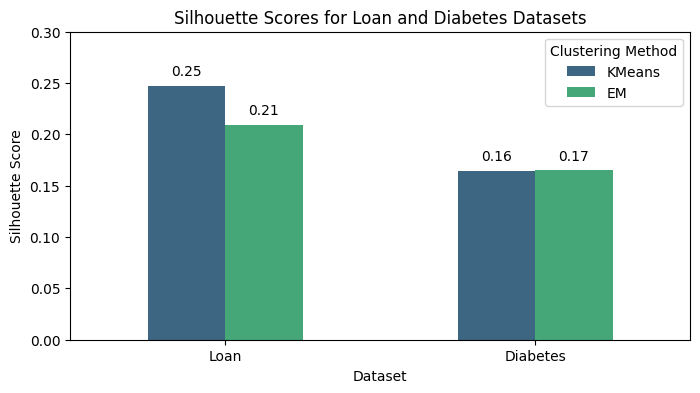

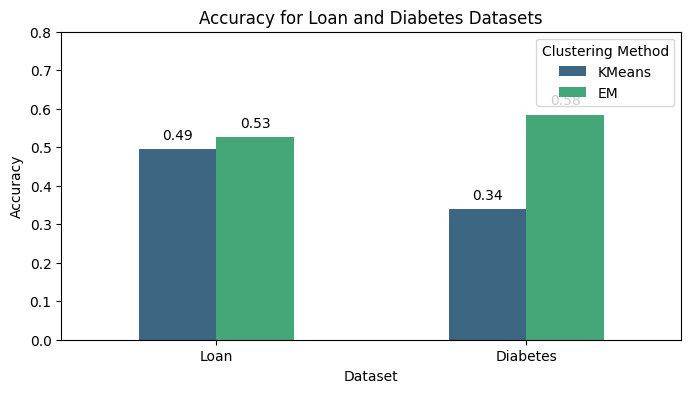

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for plotting
results_df = pd.DataFrame({
    'Dataset': ['Loan', 'Loan', 'Diabetes', 'Diabetes'],
    'Clustering Method': ['KMeans', 'EM', 'KMeans', 'EM'],
    'Silhouette Score': [loan_results['KMeans_Silhouette'], loan_results['EM_Silhouette'],
                         diabetes_results['KMeans_Silhouette'], diabetes_results['EM_Silhouette']],
    'Accuracy': [np.mean(loan_y == loan_k_labels), np.mean(loan_y == loan_em_labels),
                 np.mean(diabetes_y == diabetes_k_labels), np.mean(diabetes_y == diabetes_em_labels)]
})

# Plotting Silhouette Scores with Viridis palette, narrower bars, and annotations
plt.figure(figsize=(8, 4))
silhouette_plot = sns.barplot(data=results_df, x='Dataset', y='Silhouette Score', hue='Clustering Method', palette='viridis', width=0.5)
plt.title('Silhouette Scores for Loan and Diabetes Datasets')
plt.ylabel('Silhouette Score')
plt.xlabel('Dataset')
plt.legend(title='Clustering Method')
plt.ylim(0, 0.3)

# Adding value annotations
for p in silhouette_plot.patches:
    if p.get_height() > 0:
        silhouette_plot.annotate(f'{p.get_height():.2f}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='bottom',
                                 fontsize=10, color='black', xytext=(0, 5),
                                 textcoords='offset points')

plt.show()

# Plotting Accuracy with Viridis palette, narrower bars, and annotations
plt.figure(figsize=(8, 4))
accuracy_plot = sns.barplot(data=results_df, x='Dataset', y='Accuracy', hue='Clustering Method', palette='viridis', width=0.5)
plt.title('Accuracy for Loan and Diabetes Datasets')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.ylim(0, 0.8)
plt.legend(title='Clustering Method')

# Adding value annotations
for p in accuracy_plot.patches:
    if p.get_height() > 0:
        accuracy_plot.annotate(f'{p.get_height():.2f}',
                               (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='bottom',
                               fontsize=10, color='black', xytext=(0, 5),
                               textcoords='offset points')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction algorithms
dim_red_algorithms = {
    'RP': GaussianRandomProjection(n_components=2, random_state=0),
    'PCA': PCA(n_components=2, random_state=0),
    'ICA': FastICA(n_components=2, random_state=0)
}

# Function to apply clustering and display each plot individually
def clustering_comparison_plots(data, dataset_name):
    for dr_name, dr_algo in dim_red_algorithms.items():
        # Apply dimensionality reduction
        dr_data = dr_algo.fit_transform(data)

        # Plot for EM Clustering
        em = GaussianMixture(n_components=2, random_state=0)
        em_labels = em.fit_predict(dr_data)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=dr_data[:, 0], y=dr_data[:, 1], hue=em_labels, palette='viridis', alpha=0.7)
        plt.title(f'{dataset_name} - {dr_name} + EM')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend(title='Cluster')
        plt.show()  # Display the plot for EM

        # Plot for KMeans Clustering
        kmeans = KMeans(n_clusters=2, random_state=0)
        kmeans_labels = kmeans.fit_predict(dr_data)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=dr_data[:, 0], y=dr_data[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
        plt.title(f'{dataset_name} - {dr_name} + KMeans')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend(title='Cluster')
        plt.show()  # Display the plot for KMeans



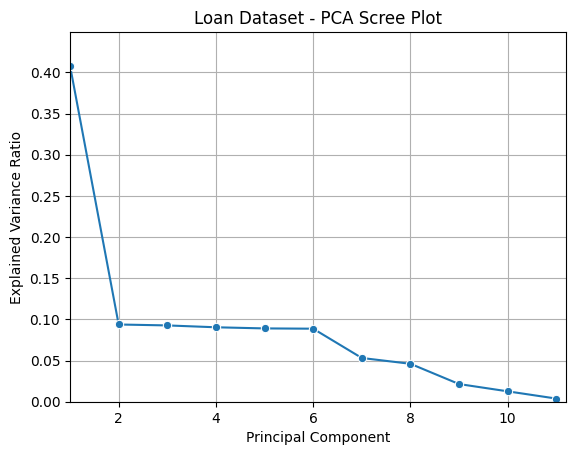

<ipython-input-53-b4db6adfa6d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, len(kurt_values)), y=kurt_values[:-1], palette='viridis')


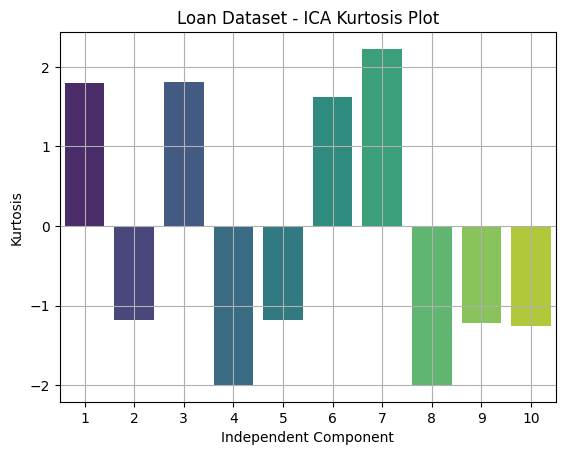

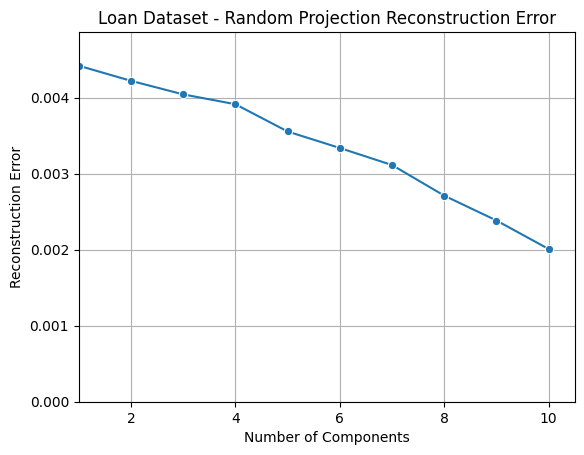

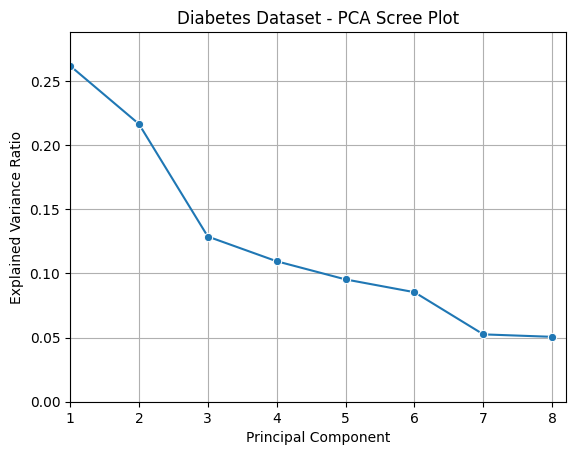

<ipython-input-53-b4db6adfa6d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, len(kurt_values)), y=kurt_values[:-1], palette='viridis')


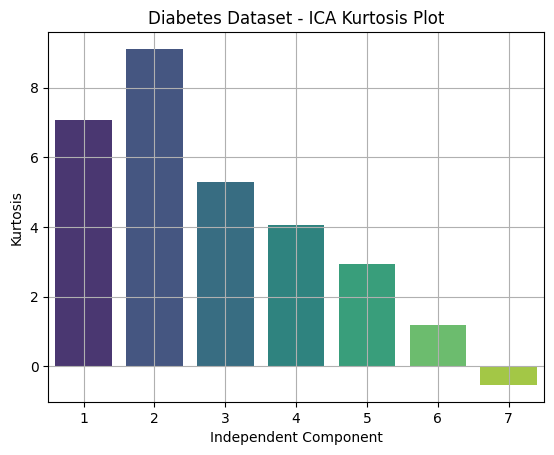

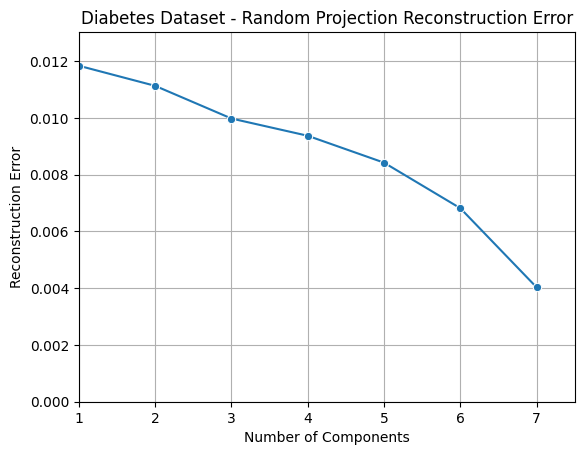

('Loan Dataset - PCA Scree Explained Variance', {1: 0.4082, 2: 0.0938, 3: 0.0927, 4: 0.0904, 5: 0.0891, 6: 0.0887, 7: 0.0531, 8: 0.0461, 9: 0.0215, 10: 0.0126, 11: 0.0038})
('Loan Dataset - ICA Kurtosis', {1: 1.8033, 2: -1.1847, 3: 1.8082, 4: -1.9982, 5: -1.1826, 6: 1.6173, 7: 2.2263, 8: -1.9985, 9: -1.2188, 10: -1.2548, 11: 2.2702})
Loan Dataset - RP Reconstruction Error{1: 0.0044, 2: 0.0042, 3: 0.004, 4: 0.0039, 5: 0.0036, 6: 0.0033, 7: 0.0031, 8: 0.0027, 9: 0.0024, 10: 0.002, 11: 0.0}
('Diabetes Dataset - PCA Scree Explained Variance', {1: 0.2618, 2: 0.2164, 3: 0.1287, 4: 0.1094, 5: 0.0953, 6: 0.0853, 7: 0.0525, 8: 0.0506})
('Diabetes Dataset - ICA Kurtosis', {1: 7.0678, 2: 9.1089, 3: 5.2943, 4: 4.048, 5: 2.9335, 6: 1.1761, 7: -0.5306, 8: -0.3697})
Diabetes Dataset - RP Reconstruction Error{1: 0.0118, 2: 0.0111, 3: 0.01, 4: 0.0094, 5: 0.0084, 6: 0.0068, 7: 0.004, 8: 0.0}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Set a global random seed for reproducibility
np.random.seed(42)

print_ls = []

# 1. PCA - Scree Plot for Explained Variance
def plot_pca_scree(data, title):
    pca = PCA(random_state=42)  # Set random state
    pca.fit(data)
    explained_variance = pca.explained_variance_ratio_
    sns.lineplot(x=range(1, len(explained_variance) + 1), y=explained_variance, marker='o')
    plt.xlim(1, len(explained_variance) + 0.2)
    plt.ylim(0, max(explained_variance[:]) * 1.1)
    plt.title(f'{title} - PCA Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()
    print_ls.append((f'{title} - PCA Scree Explained Variance', dict(zip(range(1, len(explained_variance) + 1), np.round(explained_variance, 4)))))

# 2. ICA - Kurtosis Plot
def plot_ica_kurtosis(data, title):
    ica = FastICA(random_state=42)  # Set random state
    ica_data = ica.fit_transform(data)
    kurt_values = kurtosis(ica_data, axis=0)
    sns.barplot(x=range(1, len(kurt_values)), y=kurt_values[:-1], palette='viridis')
    plt.title(f'{title} - ICA Kurtosis Plot')
    plt.xlabel('Independent Component')
    plt.ylabel('Kurtosis')
    plt.grid(True)
    plt.show()
    print_ls.append((f'{title} - ICA Kurtosis', dict(zip(range(1, len(kurt_values) + 1), np.round(kurt_values, 4)))))

# 3. Random Projection - Reconstruction Error Plot
def plot_random_projection_reconstruction(data, title):
    reconstruction_errors = []
    components = range(1, min(data.shape[1], 20) + 1)
    for n in components:
        rp = GaussianRandomProjection(n_components=n, random_state=42)  # Set random state
        rp_data = rp.fit_transform(data)
        rp_inverse = np.linalg.pinv(rp.components_.T)
        reconstructed_data = np.dot(rp_data, rp_inverse)
        error = np.linalg.norm(data - reconstructed_data) / data.size
        reconstruction_errors.append(error)
    sns.lineplot(x=components[:-1], y=reconstruction_errors[:-1], marker='o')
    plt.ylim(0, max(reconstruction_errors[:]) * 1.1)
    plt.xlim(1, len(components) - 0.5)
    plt.title(f'{title} - Random Projection Reconstruction Error')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.grid(True)
    plt.show()
    print_ls.append(f'{title} - RP Reconstruction Error' + str(dict(zip(components, np.round(reconstruction_errors, 4)))))

# Generate Visualizations
plot_pca_scree(loan_scaled, 'Loan Dataset')
plot_ica_kurtosis(loan_scaled, 'Loan Dataset')
plot_random_projection_reconstruction(loan_scaled, 'Loan Dataset')

plot_pca_scree(diabetes_scaled, 'Diabetes Dataset')
plot_ica_kurtosis(diabetes_scaled, 'Diabetes Dataset')
plot_random_projection_reconstruction(diabetes_scaled, 'Diabetes Dataset')

for i in print_ls:
    print(i)


In [ ]:
loan_X.shape

(4269, 11)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

# Define dimensionality reduction methods
dim_red_methods = {
    'PCA': PCA(n_components=3, random_state=42),
    'ICA': FastICA(n_components=3, random_state=42),
    'RP': GaussianRandomProjection(n_components=3, random_state=42)
}

# Define clustering methods
clustering_methods = {
    'KMeans': KMeans(n_clusters=2, random_state=42),
    'EM': GaussianMixture(n_components=2, random_state=42)
}

# Store results for comparison
results = []

# Function to perform clustering with dimensionality reduction and calculate silhouette score
def run_clustering_analysis(scaled_data, dataset_name):
    for dr_name, dr_algo in dim_red_methods.items():
        # Apply dimensionality reduction
        dr_data = dr_algo.fit_transform(scaled_data)

        for cluster_name, cluster_algo in clustering_methods.items():
            # Fit clustering algorithm and predict clusters
            cluster_labels = cluster_algo.fit_predict(dr_data)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(dr_data, cluster_labels)

            # Store results
            results.append({
                'Dataset': dataset_name,
                'Dimensionality Reduction': dr_name,
                'Clustering': cluster_name,
                'Silhouette Score': silhouette_avg
            })
            print(f"{dataset_name} - {dr_name} + {cluster_name} Silhouette Score: {silhouette_avg:.4f}")

# Run analysis on both datasets
run_clustering_analysis(loan_scaled, 'Loan Dataset')
run_clustering_analysis(diabetes_scaled, 'Diabetes Dataset')

# Convert results to DataFrame for easy viewing and plotting
results_df = pd.DataFrame(results)

# Display results
print("\nSummary of Clustering Analysis Results:")
print(results_df)



Loan Dataset - PCA + KMeans Silhouette Score: 0.4040
Loan Dataset - PCA + EM Silhouette Score: 0.4035
Loan Dataset - ICA + KMeans Silhouette Score: 0.2184
Loan Dataset - ICA + EM Silhouette Score: 0.2173
Loan Dataset - RP + KMeans Silhouette Score: 0.3650
Loan Dataset - RP + EM Silhouette Score: 0.3386
Diabetes Dataset - PCA + KMeans Silhouette Score: 0.2609
Diabetes Dataset - PCA + EM Silhouette Score: 0.2571
Diabetes Dataset - ICA + KMeans Silhouette Score: 0.2294
Diabetes Dataset - ICA + EM Silhouette Score: 0.2244
Diabetes Dataset - RP + KMeans Silhouette Score: 0.3987
Diabetes Dataset - RP + EM Silhouette Score: 0.3169

Summary of Clustering Analysis Results:
             Dataset Dimensionality Reduction Clustering  Silhouette Score
0       Loan Dataset                      PCA     KMeans          0.404035
1       Loan Dataset                      PCA         EM          0.403536
2       Loan Dataset                      ICA     KMeans          0.218355
3       Loan Dataset       

<ipython-input-49-5278c99c03a9>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


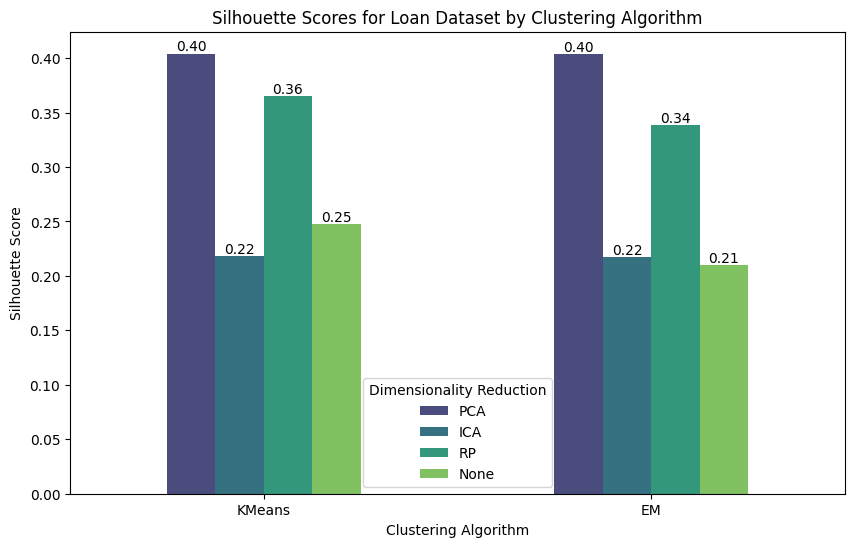

<ipython-input-49-5278c99c03a9>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


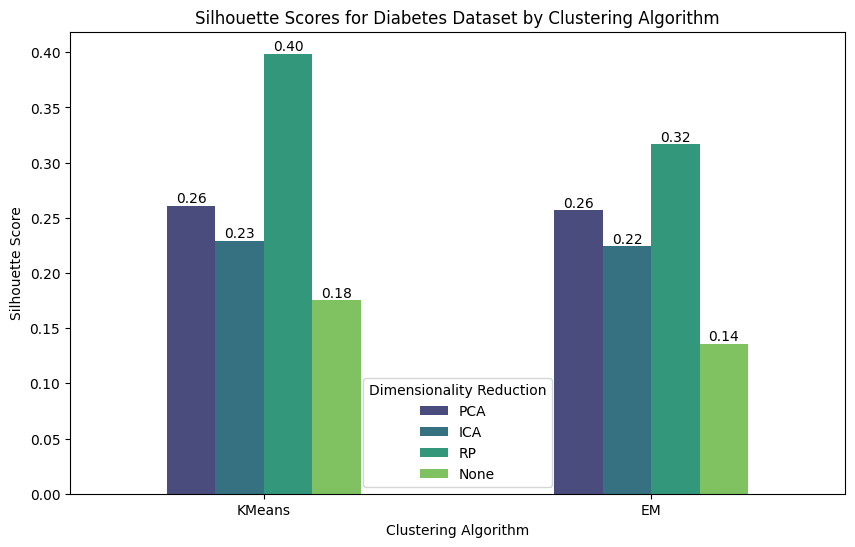

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adding the original Silhouette Scores without dimensionality reduction to the results DataFrame
original_scores = [
    {'Dataset': 'Loan Dataset', 'Dimensionality Reduction': 'None', 'Clustering': 'KMeans', 'Silhouette Score': 0.2475},
    {'Dataset': 'Loan Dataset', 'Dimensionality Reduction': 'None', 'Clustering': 'EM', 'Silhouette Score': 0.2097},
    {'Dataset': 'Diabetes Dataset', 'Dimensionality Reduction': 'None', 'Clustering': 'KMeans', 'Silhouette Score': 0.1755},
    {'Dataset': 'Diabetes Dataset', 'Dimensionality Reduction': 'None', 'Clustering': 'EM', 'Silhouette Score': 0.1361}
]

# Convert to DataFrame and append to results_df
original_df = pd.DataFrame(original_scores)
results_df = pd.concat([results_df, original_df], ignore_index=True)

# Function to add labels on top of each bar
def add_labels(ax):
    for p in ax.patches:
      if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',  # Show four decimal places
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black')


"""
# Plotting the Silhouette Scores grouped by Clustering Algorithm with labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=results_df,
    x='Clustering',  # Group by clustering algorithm on the x-axis
    y='Silhouette Score',
    hue='Dimensionality Reduction',  # Use dimensionality reduction as hue, including "None"
    ci=None,
    palette='viridis',
    width=0.5  # Adjust width to make bars skinnier
)
add_labels(ax)
plt.title('Silhouette Scores for Each Clustering Algorithm with Different Dimensionality Reductions (Including Original)')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.legend(title='Dimensionality Reduction')
plt.show()
"""

# Separate plots by dataset for clearer comparison, with labels
for dataset in results_df['Dataset'].unique():
    plt.figure(figsize=(10, 6))
    subset = results_df[results_df['Dataset'] == dataset]
    ax = sns.barplot(
        data=subset,
        x='Clustering',  # Group by clustering algorithm on the x-axis
        y='Silhouette Score',
        hue='Dimensionality Reduction',  # Use dimensionality reduction as hue, including "None"
        ci=None,
        palette='viridis',
        width=0.5  # Adjust width to make bars skinnier
    )
    add_labels(ax)
    plt.title(f'Silhouette Scores for {dataset} by Clustering Algorithm')
    plt.xlabel('Clustering Algorithm')
    plt.ylabel('Silhouette Score')
    plt.legend(title='Dimensionality Reduction')
    plt.show()


Applying PCA Dimensionality Reduction
Epoch 0/1000, BCE Train Loss: 0.6993, BCE Test Loss: 0.6943
Epoch 499/1000, BCE Train Loss: 0.5198, BCE Test Loss: 0.5074
Epoch 998/1000, BCE Train Loss: 0.5024, BCE Test Loss: 0.4945


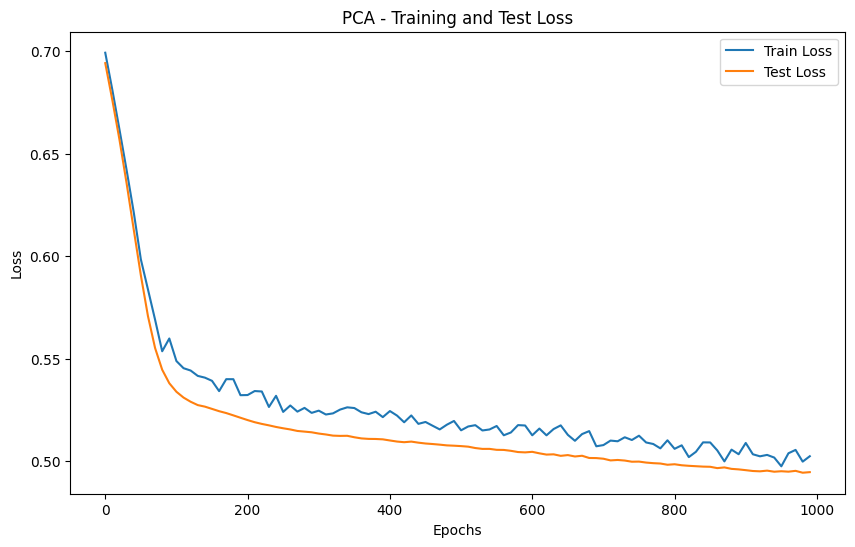

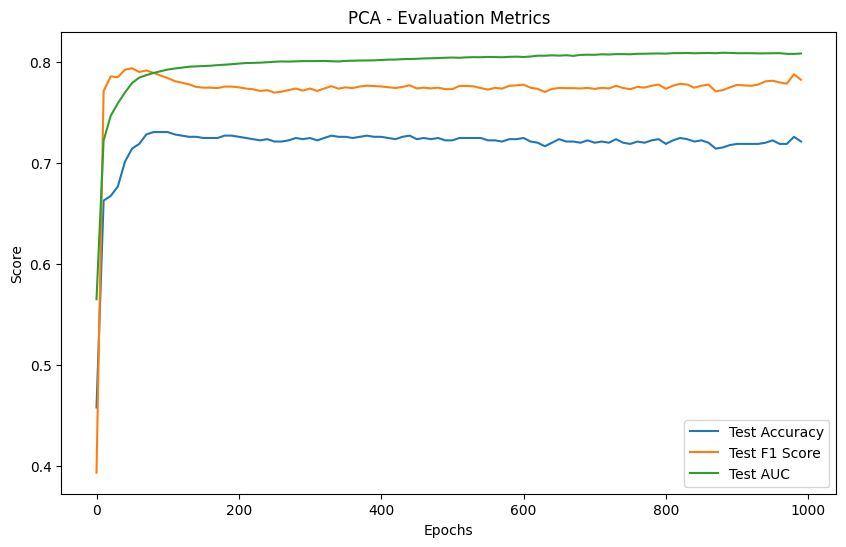

Min Test loss: 0.49433234333992004
Final Metrics for PCA - Test Accuracy: 0.7260, F1 Score: 0.7869, AUC: 0.8086

Applying ICA Dimensionality Reduction
Epoch 0/1000, BCE Train Loss: 0.7253, BCE Test Loss: 0.7206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 499/1000, BCE Train Loss: 0.5245, BCE Test Loss: 0.5127
Epoch 998/1000, BCE Train Loss: 0.5148, BCE Test Loss: 0.5049


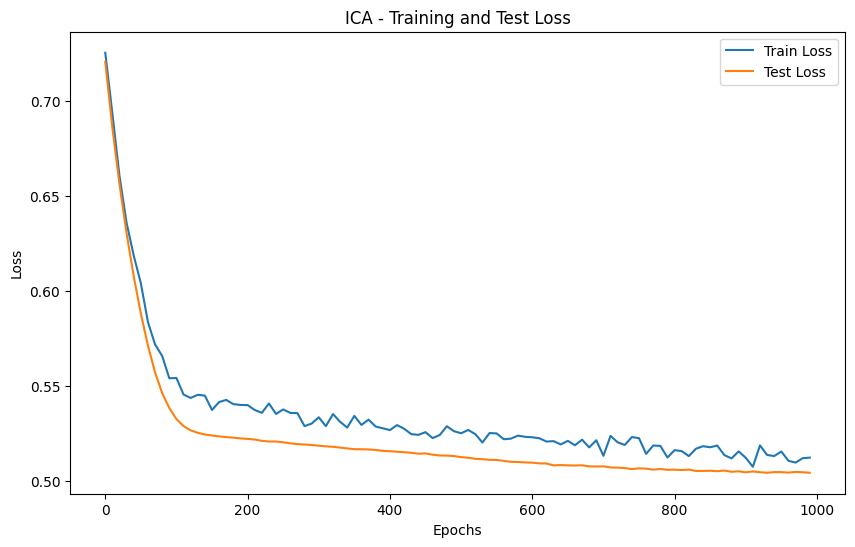

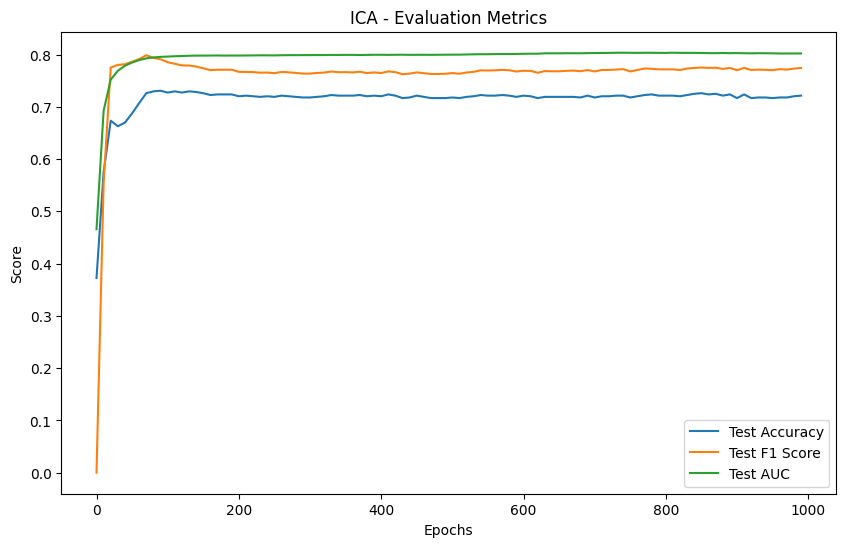

Min Test loss: 0.5045118927955627
Final Metrics for ICA - Test Accuracy: 0.7213, F1 Score: 0.7742, AUC: 0.8020

Applying RP Dimensionality Reduction
Epoch 0/1000, BCE Train Loss: 0.6883, BCE Test Loss: 0.6815
Epoch 499/1000, BCE Train Loss: 0.3879, BCE Test Loss: 0.3518
Epoch 998/1000, BCE Train Loss: 0.3848, BCE Test Loss: 0.3485


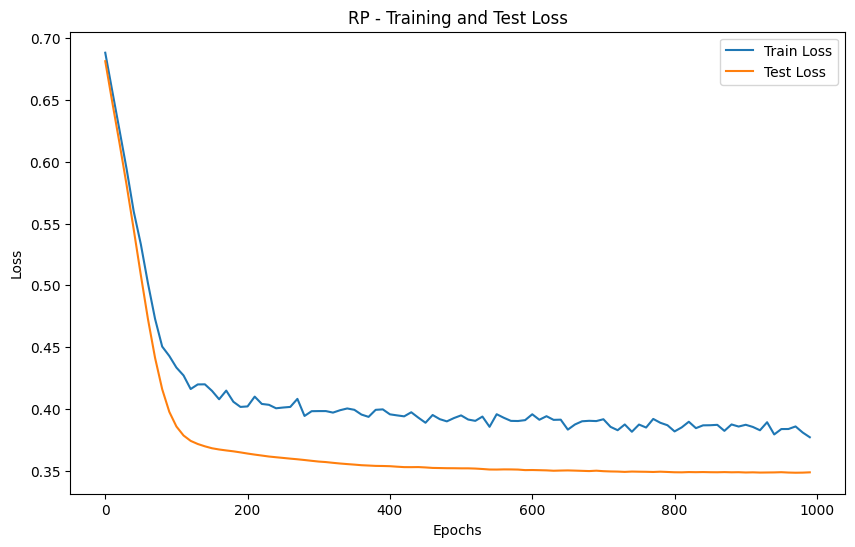

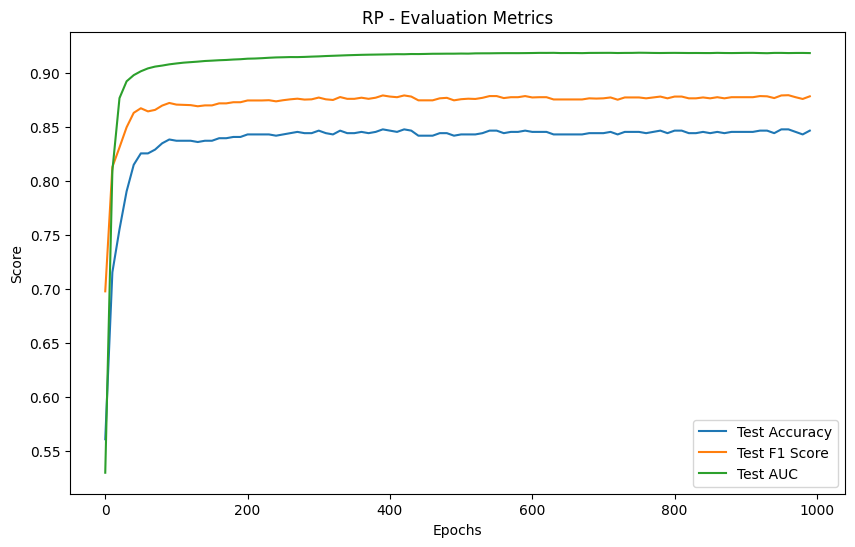

Min Test loss: 0.34825170040130615
Final Metrics for RP - Test Accuracy: 0.8443, F1 Score: 0.8767, AUC: 0.9185



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dimensionality reduction techniques
dim_red_methods = {
    'PCA': PCA(n_components=3, random_state=42),
    'ICA': FastICA(n_components=3, random_state=42),
    'RP': GaussianRandomProjection(n_components=3, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(loan_X, loan_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over each dimensionality reduction method
for method_name, dim_red in dim_red_methods.items():
    print(f"Applying {method_name} Dimensionality Reduction")

    # Apply dimensionality reduction
    X_train_reduced = dim_red.fit_transform(X_train_scaled)
    X_test_reduced = dim_red.transform(X_test_scaled)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_reduced, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test_reduced, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

    # Initialize the neural network
    model = NN(input_size=X_train_tensor.shape[1]).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []
    test_accuracies = []
    test_precisions = []
    test_recalls = []
    test_f1_scores = []
    test_auc_scores = []

    # Training loop
    epochs = 1000
    for epoch in range(epochs):
        model.train()

        # Forward pass and loss calculation
        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate on the test set
        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test_tensor)
            test_loss = criterion(y_pred_test, y_test_tensor).item()

            # Convert predictions to binary labels (threshold at 0.5)
            y_pred_test_labels = (y_pred_test >= 0.5).cpu().numpy()
            y_test_labels = y_test_tensor.cpu().numpy()

            # Calculate metrics
            accuracy = accuracy_score(y_test_labels, y_pred_test_labels)
            precision = precision_score(y_test_labels, y_pred_test_labels)
            recall = recall_score(y_test_labels, y_pred_test_labels)
            f1 = f1_score(y_test_labels, y_pred_test_labels)
            auc = roc_auc_score(y_test_labels, y_pred_test.cpu().numpy())

        # Logging metrics
        if epoch % 10 == 0:
            train_losses.append(loss.item())
            test_losses.append(test_loss)
            test_accuracies.append(accuracy)
            test_precisions.append(precision)
            test_recalls.append(recall)
            test_f1_scores.append(f1)
            test_auc_scores.append(auc)

        # Print progress every 500 epochs
        if epoch % 499 == 0:
            print(f'Epoch {epoch}/{epochs}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')

    # Plotting Loss and Metrics
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, epochs, 10), train_losses, label="Train Loss")
    plt.plot(range(0, epochs, 10), test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{method_name} - Training and Test Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(0, epochs, 10), test_accuracies, label="Test Accuracy")
    #plt.plot(range(0, epochs, 10), test_precisions, label="Test Precision")
    #plt.plot(range(0, epochs, 10), test_recalls, label="Test Recall")
    plt.plot(range(0, epochs, 10), test_f1_scores, label="Test F1 Score")
    plt.plot(range(0, epochs, 10), test_auc_scores, label="Test AUC")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title(f"{method_name} - Evaluation Metrics")
    plt.legend()
    plt.show()

    print("Min Test loss:", min(test_losses))
    #print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")
    print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")


In [ ]:
loan_2x = pd.concat([loan_X, loan_X])


pd.concat([loan_2x, loan_y], axis=1, ignore_index=True)

k_labels = pd.concat([loan_y, pd.Series(loan_k_labels)], ignore_index=True)
em_labels = pd.concat([loan_y, pd.Series(loan_em_labels)], ignore_index=True)

(8538,)

Epoch 0/1000, BCE Train Loss: 0.6928, BCE Test Loss: 0.6900
Epoch 499/1000, BCE Train Loss: 0.4288, BCE Test Loss: 0.4030
Epoch 998/1000, BCE Train Loss: 0.3995, BCE Test Loss: 0.3885


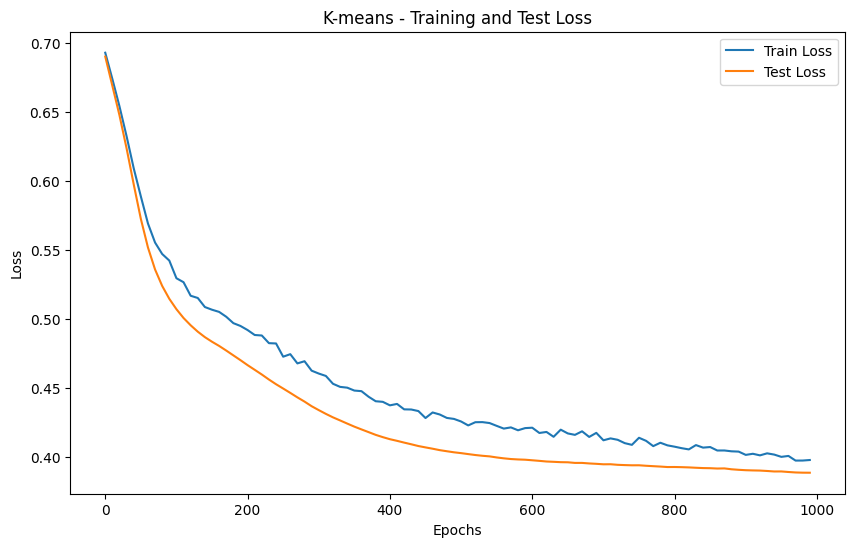

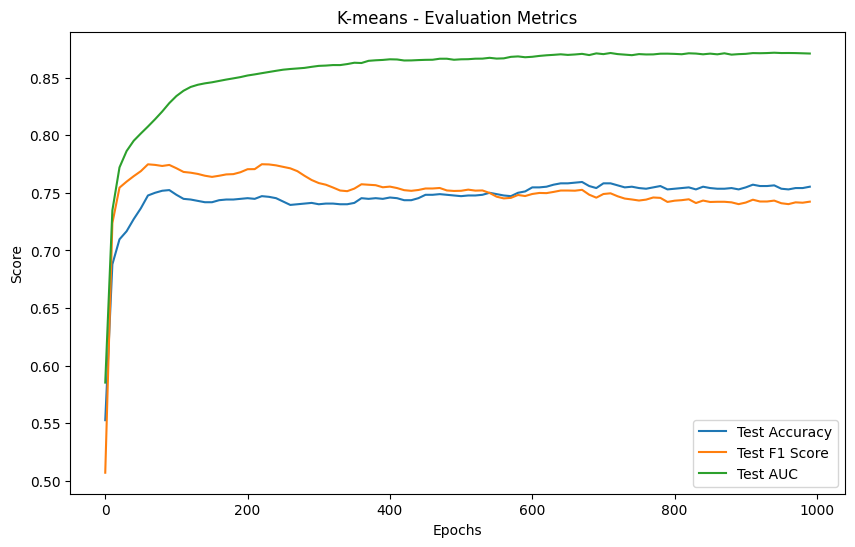

Min Test loss: 0.3887847065925598
Final Metrics for K-means - Test Accuracy: 0.7559, F1 Score: 0.7428, AUC: 0.8707



In [ ]:
#K-means NN
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(loan_2x, k_labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
method_name = 'K-means'
# Define the neural network
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

# Initialize the neural network
model = NN(input_size=X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []
test_auc_scores = []

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass and loss calculation
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

        # Convert predictions to binary labels (threshold at 0.5)
        y_pred_test_labels = (y_pred_test >= 0.5).cpu().numpy()
        y_test_labels = y_test_tensor.cpu().numpy()

        # Calculate metrics
        accuracy = accuracy_score(y_test_labels, y_pred_test_labels)
        precision = precision_score(y_test_labels, y_pred_test_labels)
        recall = recall_score(y_test_labels, y_pred_test_labels)
        f1 = f1_score(y_test_labels, y_pred_test_labels)
        auc = roc_auc_score(y_test_labels, y_pred_test.cpu().numpy())

    # Logging metrics
    if epoch % 10 == 0:
        train_losses.append(loss.item())
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        test_precisions.append(precision)
        test_recalls.append(recall)
        test_f1_scores.append(f1)
        test_auc_scores.append(auc)

    # Print progress every 500 epochs
    if epoch % 499 == 0:
        print(f'Epoch {epoch}/{epochs}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')

# Plotting Loss and Metrics
plt.figure(figsize=(10, 6))
plt.plot(range(0, epochs, 10), train_losses, label="Train Loss")
plt.plot(range(0, epochs, 10), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"{method_name} - Training and Test Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, epochs, 10), test_accuracies, label="Test Accuracy")
#plt.plot(range(0, epochs, 10), test_precisions, label="Test Precision")
#plt.plot(range(0, epochs, 10), test_recalls, label="Test Recall")
plt.plot(range(0, epochs, 10), test_f1_scores, label="Test F1 Score")
plt.plot(range(0, epochs, 10), test_auc_scores, label="Test AUC")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title(f"{method_name} - Evaluation Metrics")
plt.legend()
plt.show()

print("Min Test loss:", min(test_losses))
#print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")
print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")


Epoch 0/1000, BCE Train Loss: 0.6598, BCE Test Loss: 0.6547
Epoch 499/1000, BCE Train Loss: 0.4201, BCE Test Loss: 0.4112
Epoch 998/1000, BCE Train Loss: 0.3985, BCE Test Loss: 0.3988


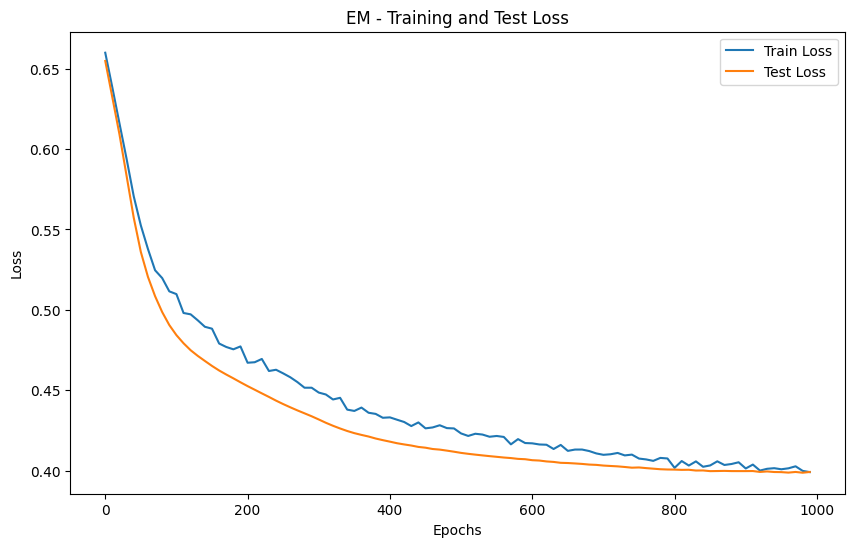

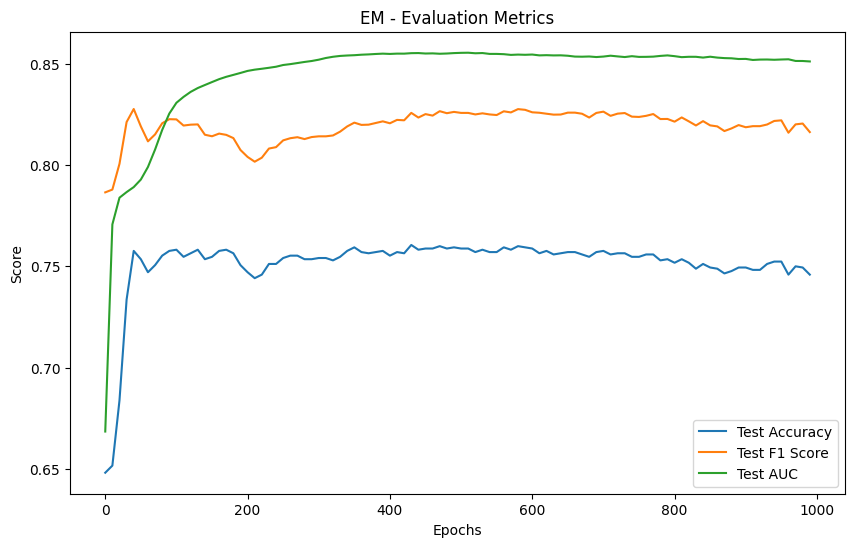

Min Test loss: 0.39880865812301636
Final Metrics for EM - Test Accuracy: 0.7465, F1 Score: 0.8177, AUC: 0.8506



In [ ]:
#EM NN
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(loan_2x, em_labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
method_name = 'EM'

# Define the neural network
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

# Initialize the neural network
model = NN(input_size=X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []
test_auc_scores = []

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass and loss calculation
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

        # Convert predictions to binary labels (threshold at 0.5)
        y_pred_test_labels = (y_pred_test >= 0.5).cpu().numpy()
        y_test_labels = y_test_tensor.cpu().numpy()

        # Calculate metrics
        accuracy = accuracy_score(y_test_labels, y_pred_test_labels)
        precision = precision_score(y_test_labels, y_pred_test_labels)
        recall = recall_score(y_test_labels, y_pred_test_labels)
        f1 = f1_score(y_test_labels, y_pred_test_labels)
        auc = roc_auc_score(y_test_labels, y_pred_test.cpu().numpy())

    # Logging metrics
    if epoch % 10 == 0:
        train_losses.append(loss.item())
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        test_precisions.append(precision)
        test_recalls.append(recall)
        test_f1_scores.append(f1)
        test_auc_scores.append(auc)

    # Print progress every 500 epochs
    if epoch % 499 == 0:
        print(f'Epoch {epoch}/{epochs}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')

# Plotting Loss and Metrics
plt.figure(figsize=(10, 6))
plt.plot(range(0, epochs, 10), train_losses, label="Train Loss")
plt.plot(range(0, epochs, 10), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"{method_name} - Training and Test Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, epochs, 10), test_accuracies, label="Test Accuracy")
#plt.plot(range(0, epochs, 10), test_precisions, label="Test Precision")
#plt.plot(range(0, epochs, 10), test_recalls, label="Test Recall")
plt.plot(range(0, epochs, 10), test_f1_scores, label="Test F1 Score")
plt.plot(range(0, epochs, 10), test_auc_scores, label="Test AUC")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title(f"{method_name} - Evaluation Metrics")
plt.legend()
plt.show()

print("Min Test loss:", min(test_losses))
#print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")
print(f"Final Metrics for {method_name} - Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}\n")
